## Exploratory Data Analysis

In this Notebook, we will show the main dataset features.

In addition to images, we are given a `.csv` file, whose columns are:

* `image_name`: unique identifier, points to filename of related DICOM image
* `patient_id`: unique patient identifier
* `sex`: the sex of the patient (when unknown, will be blank)
* `age_approx`: approximate patient age at time of imaging
* `anatom_site_general_challenge`: location of imaged site
* `diagnosis`: detailed diagnosis information (train only)
* `benign_malignant`: indicator of malignancy of imaged lesion
* `target`: binarized version of the target variable

For each variable, we will visualize its distribution.

First of all, let's start reading correctly the `.csv` file and saving it into the variable `df`:

In [1]:
import pandas as pd
save_path = '../documentacion/eda/'
df = pd.read_csv("../data/input/complete_train.csv")

Now let's verify the data has been read correctly, and let's display its main info:

In [2]:
def write_latex_table(df, file_name):
    df.to_latex(buf = save_path + file_name)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


So there are 33126 rows and 8 columns. In addition to this, we can also observe there are some missing values:

In [4]:
missing = df.isnull().sum() / df.shape[0]
missing = missing[missing > 0].sort_values(ascending=False)
write_latex_table(missing, 'missing_table.txt')
missing

anatom_site_general_challenge    0.015909
age_approx                       0.002053
sex                              0.001962
dtype: float64

Let's take a look at the dataframe head:

In [5]:
write_latex_table(df.head(), 'df_head_table.txt')
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


* The first column is a unique `image_name` identifier for the image related to each row,
* There is a `patient_id` column, so it seems like there could be more than one image for each patient,
* There is a column `sex`, as a string,
* A column `age_approx`, as floats, even though all values seems to be multiple of 5,
* the `anatom_site_general_challenge` inform about the body location where the skin lesion is
* The `diagnosis` column contains verbal information about what subtype of skin cancer it is
* The column `benign_malignant`, as it is just a verbal expression for the `target` column, (0 is benign and 1 is malignant).

Let's study the target variable distribution:

In [6]:
target = pd.DataFrame(df.target.value_counts().reset_index().values, columns=["target", "occurrences"])
target['proportion'] = target['occurrences']*100/len(df)
write_latex_table(target, 'target_proportions.txt')
target

,target,occurrences,proportion
0,0,32542,98.237034
1,1,584,1.762966


It is easy to see the strong unbalance..

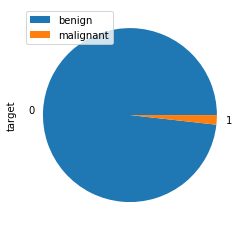

In [7]:
plot = df.target.value_counts().plot.pie()
plot.legend(['benign', 'malignant'], loc='upper left')
plot.figure.savefig(save_path + 'target_pie.png')

In [8]:
n = len(set(df.patient_id.values))
print('Number of different patients is {}'.format(n))

Number of different patients is 2056


So there are generally more than one image per patient. Now let's visualize the others variables distribution with respect to the target. Starting with sex:

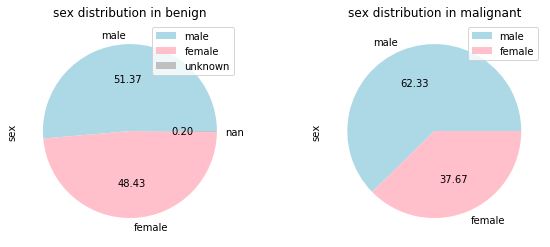

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

variable_name='sex'

benign = df[df['target']==0]
malignant = df[df['target']==1]

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

benign[variable_name].value_counts(dropna=False).plot(kind='pie', ax=axs[0], autopct='%.2f', colors = ['lightblue', 'pink', 'silver'])
malignant[variable_name].value_counts(dropna=False).plot(kind='pie', ax=axs[1], autopct='%.2f', colors = ['lightblue', 'pink'])

axs[0].set_title(variable_name+' distribution in benign')
axs[1].set_title(variable_name+' distribution in malignant')

axs[0].legend(['male', 'female', 'unknown'], loc='upper right')
axs[1].legend(['male', 'female'], loc='upper right')

fig.savefig(save_path + 'sex_pie.png')

It seems to be a little bit unbalanced. All the 0.2% cases whose gender is unknown are benign, but it's no surpise since only 1.7% of the entire population is malignant. The `age` distribution is easier to visualise in a density histogram:

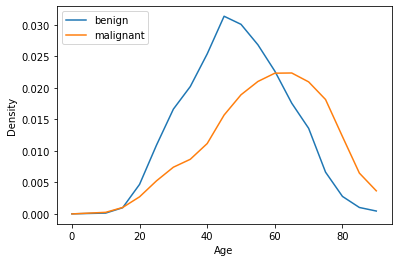

In [84]:
import numpy as np
import math
from matplotlib.colors import to_rgba as rgba

different_age_values= np.array([e for e in np.unique(df.age_approx.to_numpy()) if not math.isnan(e)])
plot = df.groupby('target').age_approx.plot(kind='kde', ind = different_age_values)
plt.xlabel('Age')
plt.legend(['benign', 'malignant'], loc='upper left')
fig = plot[0].get_figure()

fig.savefig(save_path + 'age_histogram.png')

Even if the mean is a little bit displaced to the right, it seems to be well distributed. Finally, let's take a look at the `anatom_site`:

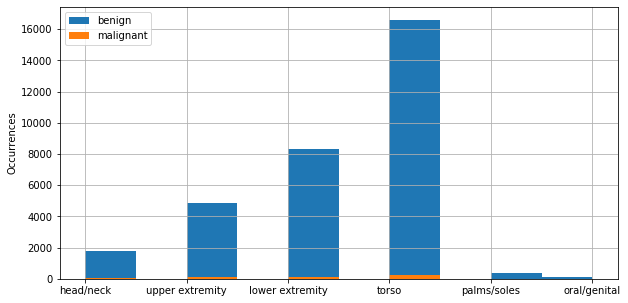

In [85]:
plot = df.groupby('target').anatom_site_general_challenge.hist(figsize = (10, 5))
plt.ylabel('Occurrences')
plt.legend(['benign', 'malignant'], loc='upper left')
fig = plot[0].get_figure()
fig.savefig(save_path + 'site_histogram.png')

And the `diagnosis`:

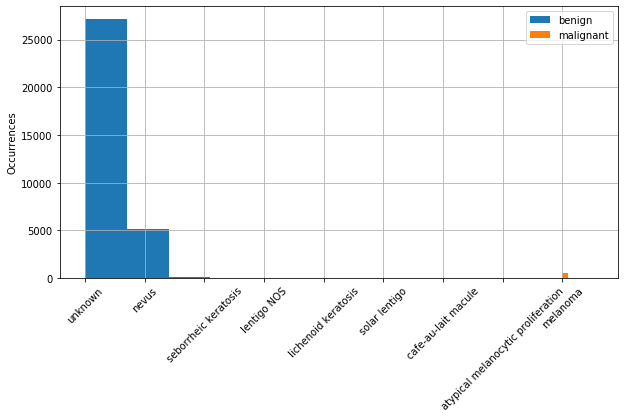

In [86]:
plot = df.groupby('target').diagnosis.hist(figsize = (10, 5))
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.legend(['benign', 'malignant'], loc='upper right')
fig = plot[0].get_figure()
fig.savefig(save_path + 'diagnosis_histogram.png', bbox_inches='tight')

Of course, `malanoma` value for the `diagnosis` column has the same meaning of 1 in `target` as all melanoma are malignant and non-melanoma benign:

In [13]:
print(np.unique(df[df['diagnosis']=='melanoma'].target))
print(np.unique(df[df['target']==1].diagnosis))

[1]
['melanoma']


I.e., every melanoma is malignant and vice versa

Let's take a look now at the `.dcm` files. DICOM (Digital Imaging and Communication On Medicine) is an images and data transmission standard in medicine. A DICOM file consists of a header and image data sets packed into a single file. Let's see what the header is like:

In [14]:
from root.utils import getDICOMHeader

dicom_header = getDICOMHeader(5)
write_latex_table(dicom_header.head(), 'dicom_header_table.txt')
dicom_header.head()

,image_name,dcm_modality,dcm_study_date,dcm_age,dcm_sex,dcm_body_part_examined,dcm_patient_orientation,dcm_photometric_interpretation,dcm_rows,dcm_columns
0,ISIC_3918318,"""XC""",20200519,065Y,M,TORSO,,YBR_FULL_422,4000,6000
0,ISIC_4975848,"""XC""",20200520,070Y,M,LOWER EXTREMITY,,YBR_FULL_422,4000,6000
0,ISIC_8647334,"""XC""",20200519,045Y,F,LOWER EXTREMITY,,YBR_FULL_422,4000,6000
0,ISIC_2887033,"""XC""",20200519,050Y,F,UPPER EXTREMITY,,YBR_FULL_422,3456,5184
0,ISIC_8690825,"""XC""",20200519,040Y,F,UPPER EXTREMITY,,YBR_FULL_422,3456,5184


The `dcm_photometric_interpretation` parameter is telling us that images are interpreted in a YBR color space, so a conversion to RGB must be done before visulization. Let's now visualize some images, benign and malignant:

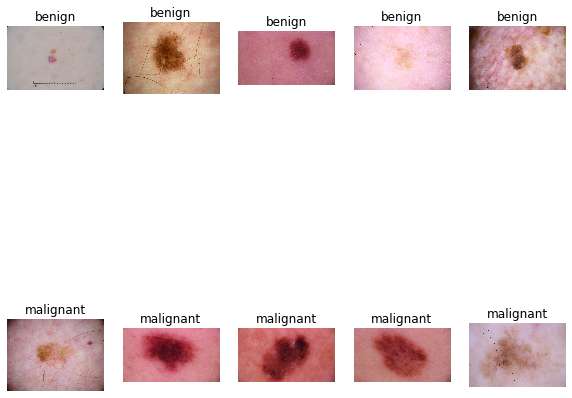

In [33]:
import os
import random
from root.utils import displaySeveralImages, readDicomImage

benign_sample = df[df['target']==0].sample(5)
malignant_sample = df[df['target']==1].sample(5)

sample = pd.concat([benign_sample, malignant_sample])

images_names = list(sample.image_name.values)
targets = list(sample.benign_malignant.values)

images = [readDicomImage('../data/input/train/' + image_name + '.dcm') for image_name in images_names]

displaySeveralImages(images, ncols= 5, titles=targets, save = save_path + 'random_images.png')

They seem to have different shapes.